In [2]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import os


In [3]:
os.chdir(r"C:\Users\tandu\iCloudDrive\Research\Data\Phenotype")

In [4]:
dataset = pd.read_csv('Maize_allphospho(1).csv')
dataset = dataset.drop(dataset.columns[0], axis=1)
dataset.head

<bound method NDFrame.head of        sol  sol_Hi  sol_Lo  sol_Mo  sol_VL         tot        lab         org  \
0      8.0       0       0     100       0  272.378723  19.742783   67.555527   
1      9.0       0      30      70       0  321.889160  39.771477  130.869049   
2      9.0       0      30      70       0  297.140411  15.604735   55.663460   
3      8.0       0       0     100       0  272.378723  19.742783   67.555527   
4      9.0       0      30      70       0  272.378723  14.778452   33.163631   
...    ...     ...     ...     ...     ...         ...        ...         ...   
3534  12.0       0     100       0       0  184.489365   9.688712   34.560482   
3535  12.0       0     100       0       0  184.489365   9.688712   34.560482   
3536   9.0       0      40      60       0  184.489365   9.688712   34.560482   
3537   8.0       0       0     100       0  184.489365   9.688712   34.560482   
3538  11.0       0      60      40       0  297.140411  21.537582   73.696930  

In [5]:
# Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sol     3502 non-null   float64
 1   sol_Hi  3539 non-null   int64  
 2   sol_Lo  3539 non-null   int64  
 3   sol_Mo  3539 non-null   int64  
 4   sol_VL  3539 non-null   int64  
 5   tot     2561 non-null   float64
 6   lab     2561 non-null   float64
 7   org     2561 non-null   float64
 8   occ     2561 non-null   float64
 9   sec     2561 non-null   float64
 10  apa     2561 non-null   float64
 11  stp10   3468 non-null   float64
 12  stp100  3468 non-null   float64
 13  stp20   3468 non-null   float64
 14  stp30   3468 non-null   float64
 15  PBR1    3217 non-null   float64
 16  PBR2    3044 non-null   float64
 17  PHO1    1097 non-null   float64
 18  PHO2    891 non-null    float64
 19  PMEH1   1627 non-null   float64
 20  PMEH2   1627 non-null   float64
 21  PNZ1    3217 non-null   float64
 22  

In [6]:
maize_pca = pd.read_csv("maize_covariates.csv")
maize_pca_second_column = maize_pca.iloc[:, 1]
#maize_pca = maize_pca[['EV1']]
maize_pca_second_column

0      -0.015897
1      -0.009884
2      -0.009309
3      -0.010773
4      -0.015116
          ...   
3534   -0.009823
3535   -0.010400
3536   -0.009009
3537   -0.014760
3538   -0.018210
Name: EV1, Length: 3539, dtype: float64

In [7]:
dataset = pd.concat([maize_pca_second_column, dataset], axis=1)
print(dataset)
dataset.info()

           EV1   sol  sol_Hi  sol_Lo  sol_Mo  sol_VL         tot        lab  \
0    -0.015897   8.0       0       0     100       0  272.378723  19.742783   
1    -0.009884   9.0       0      30      70       0  321.889160  39.771477   
2    -0.009309   9.0       0      30      70       0  297.140411  15.604735   
3    -0.010773   8.0       0       0     100       0  272.378723  19.742783   
4    -0.015116   9.0       0      30      70       0  272.378723  14.778452   
...        ...   ...     ...     ...     ...     ...         ...        ...   
3534 -0.009823  12.0       0     100       0       0  184.489365   9.688712   
3535 -0.010400  12.0       0     100       0       0  184.489365   9.688712   
3536 -0.009009   9.0       0      40      60       0  184.489365   9.688712   
3537 -0.014760   8.0       0       0     100       0  184.489365   9.688712   
3538 -0.018210  11.0       0      60      40       0  297.140411  21.537582   

             org         occ  ...   PHO2   PMEH1  P

In [8]:
# Checking the presence of categorical features
dataset.describe(include='O')

ValueError: No objects to concatenate

In [9]:
#Creating the input features X and target variable y
X= dataset.iloc[:,1:28]
y= dataset.iloc[:,0].values

In [19]:
# Create a data set with all the input features after converting them to numeric including target variable
full_data= X.copy()
full_data['EV1']= y
full_data.head(8)

,sol,sol_Hi,sol_Lo,sol_Mo,sol_VL,tot,lab,org,occ,sec,...,PHO2,PMEH1,PMEH2,PNZ1,PNZ2,POL1,POL2,TP1,TP2,EV1
0,8.0,0,0,100,0,272.378723,19.742783,67.555527,102.826088,30.978016,...,NaN,719.0,230.0,4727.0,5387.0,650.0,199.0,700.0,600.0,-0.015897
1,9.0,0,30,70,0,321.889160,39.771477,130.869049,73.313477,23.083660,...,NaN,NaN,NaN,3072.0,4551.0,NaN,NaN,NaN,NaN,-0.009884
2,9.0,0,30,70,0,297.140411,15.604735,55.663460,130.878677,13.038733,...,800.0,2521.0,306.0,2258.0,2507.0,766.0,129.0,500.0,400.0,-0.009309
3,8.0,0,0,100,0,272.378723,19.742783,67.555527,102.826088,30.978016,...,NaN,1217.0,327.0,4256.0,4311.0,634.0,NaN,600.0,600.0,-0.010773
4,9.0,0,30,70,0,272.378723,14.778452,33.163631,128.609207,16.709021,...,NaN,1293.0,538.0,2822.0,2659.0,906.0,NaN,600.0,400.0,-0.015116
5,9.0,10,0,70,20,532.376648,45.548256,25.685507,91.970459,30.454041,...,NaN,NaN,NaN,2902.0,3359.0,NaN,NaN,400.0,300.0,-0.018069
6,9.0,10,20,50,20,545.812012,58.875229,83.113129,117.754028,28.803104,...,25.0,1983.0,172.0,3792.0,3786.0,NaN,NaN,700.0,400.0,-0.016920
7,8.0,0,0,100,0,321.889160,39.771477,130.869049,73.313477,23.083660,...,1200.0,2976.0,288.0,1741.0,2028.0,871.0,153.0,500.0,400.0,-0.014964


In [20]:
# Applying step 1 of the filter method
# Identify input features having high correlation with target variable

importances = full_data.drop("EV1", axis=1).apply(lambda x: x.corr(full_data.EV1))
indices = np.argsort(importances)
print(importances[indices])

sol_Hi   -0.294381
sol      -0.106655
POL2     -0.103776
PMEH2     0.000886
sol_Lo    0.001234
sol_Mo    0.066007
POL1      0.085760
PNZ1      0.093505
PBR2      0.100178
PBR1      0.139993
sol_VL    0.144000
PNZ2      0.156046
org       0.199076
PMEH1     0.234201
sec       0.249960
lab       0.291087
occ       0.385651
tot       0.391909
stp10     0.412784
apa       0.415450
TP1       0.420241
stp100    0.421499
stp30     0.426044
stp20     0.442227
PHO1      0.464630
TP2       0.526864
PHO2      0.541163
dtype: float64


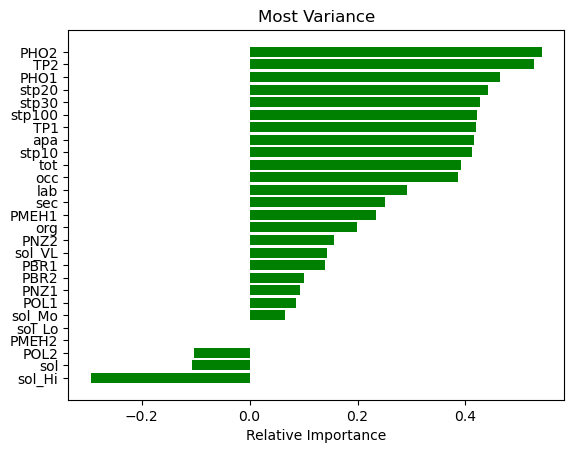

In [21]:
#Plotting 
exclude = ['EV1']
names = [col for col in dataset.columns if col not in exclude]
#print(columns_keep)
#names=['sol_Hi','sol','POL2','PMEH2','POL1','sol_Lo','sol_Mo','PNZ1','PBR1','PBR2','PMEH1','sol_VL',]
plt.title('Most Variance')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [75]:
# We want to keep features with only a high correlation with the target variable. This implies that the input feature has a high influence in predicting the target variable.
# We set the threshold to the absolute value of 0.3. We keep input features only if the correlation of the input feature with the target variable is greater than 0.4

for i in range(0, len(indices)):
    if np.abs(importances[i])>=0.2:
        print(names[i])

sol_Hi
tot
lab
occ
sec
apa
stp10
stp100
stp20
stp30
PHO1
PHO2
PMEH1
TP1
TP2


In [76]:
X = dataset[['sol_Hi','tot','lab','sec','apa','stp10','stp100','stp20','stp30','PHO1','PHO2','PMEH1','TP1','TP2']]

In [77]:
# Step 2 of the filter method
#Identify input features that have a low correlation with other independent variables.
#Iterating through all the filtered input features based on step 1 and checking each input feature correlation with all other input features.
#We will keep input features that are not highly correlated with other input features

for i in range(0,len(X.columns)):
    for j in  range(0,len(X.columns)):
        if i!=j:
            corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
            if corr_1 <0.3:
                print( X.columns[i] , " is not correlated  with ", X.columns[j])
            elif corr_1>0.75:
                print( X.columns[i] , " is highly  correlated  with ", X.columns[j])

sol_Hi  is not correlated  with  tot
sol_Hi  is not correlated  with  lab
sol_Hi  is not correlated  with  sec
sol_Hi  is not correlated  with  apa
sol_Hi  is not correlated  with  stp10
sol_Hi  is not correlated  with  stp100
sol_Hi  is not correlated  with  stp20
sol_Hi  is not correlated  with  stp30
sol_Hi  is not correlated  with  PHO1
sol_Hi  is not correlated  with  PMEH1
sol_Hi  is not correlated  with  TP1
sol_Hi  is not correlated  with  TP2
tot  is not correlated  with  sol_Hi
tot  is highly  correlated  with  lab
tot  is highly  correlated  with  sec
tot  is highly  correlated  with  apa
tot  is not correlated  with  PHO1
tot  is not correlated  with  PHO2
tot  is not correlated  with  PMEH1
tot  is not correlated  with  TP2
lab  is not correlated  with  sol_Hi
lab  is highly  correlated  with  tot
lab  is highly  correlated  with  sec
lab  is not correlated  with  PHO1
lab  is not correlated  with  PHO2
lab  is not correlated  with  PMEH1
lab  is not correlated  with  TP2


In [25]:
#Based on the above result we keep non correlated 
X= dataset[['apa','stp10','PHO1','TP1']]

In [46]:
#Apply step 3 of the filter method
# Find the information gain or mutual information of the independent variable with respect to a target variable
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)
mi = mutual_info_regression(X, y)

In [47]:
#Plotting the mutual information
import pandas as pd
X_np = X.values
mi = mutual_info_regression(X_np, y)
mi = pd.Series(mi)
mi.index = X.columns
mi.sort_values(ascending=False, inplace=True)
mi.sort_values(ascending=False).plot.bar(figsize=(10, 4))

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:
#using the SelectKBest class from the sklearn.feature_selection module
from sklearn.feature_selection import SelectKBest,  f_classif , f_regression, mutual_info_classif, mutual_info_regression, chi2, SelectPercentile, SelectFpr, SelectFdr, SelectFwe, GenericUnivariateSelect
from sklearn.feature_selection import chi2

In [9]:
# X is a matrix of feature values and y is a vector of target values
x_feature = dataset.iloc[::,1:28]
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x_feature = imputer.fit_transform(x_feature)
#x_feature = x_feature.to_numpy()

y_target = dataset[['EV1']]
y_target = y_target.values
print(x_feature)
print(y_target)
print(np.isinf(x_feature).any())

[[  8.           0.           0.         ... 199.         700.
  600.        ]
 [  9.           0.          30.         ... 153.54614549 631.06508876
  515.84483892]
 [  9.           0.          30.         ... 129.         500.
  400.        ]
 ...
 [  9.           0.          40.         ... 153.54614549 631.06508876
  515.84483892]
 [  8.           0.           0.         ... 113.         500.
  400.        ]
 [ 11.           0.          60.         ... 182.         900.
  700.        ]]
[[-0.01589676]
 [-0.00988401]
 [-0.00930928]
 ...
 [-0.00900873]
 [-0.01475961]
 [-0.01820967]]
False


In [67]:
#Select the top 10 features using chi-square test
selector = SelectKBest(score_func = chi2, k = 10)

#x_feature_new = selector.fit_transform(x_feature, y_target)
fit = selector.fit(x_feature, y_target)

ValueError: Unknown label type: (array([[-0.01589676],
       [-0.00988401],
       [-0.00930928],
       ...,
       [-0.00900873],
       [-0.01475961],
       [-0.01820967]]),)

In [18]:
#Select the top 10 features using F test
x_feature_original = x_feature
x_feature_original = pd.DataFrame(x_feature_original)

selector = SelectKBest(score_func = f_regression, k = 10)


x_feature_new = selector.fit_transform(x_feature, y_target.ravel())
print(x_feature_new)
selected_feature_names = x_feature_original.columns[selector.get_support()]

#selected_columns = dataset.iloc[:, selected_feature_names]
print("column number first is zero", selected_feature_names)
#print(dataset)
#selected_columns

selected_feature_names = selected_feature_names + 1
selected_columns = dataset.iloc[:, selected_feature_names]
selected_columns
print("after",selected_columns)



[[   0.          272.37872314  102.82608795 ...  761.79559326
   700.          600.        ]
 [   0.          321.88916016   73.31347656 ...  999.77081299
   631.06508876  515.84483892]
 [   0.          297.14041138  130.87867737 ... 1074.6730957
   500.          400.        ]
 ...
 [   0.          184.48936462   81.26031494 ...  504.95513916
   631.06508876  515.84483892]
 [   0.          184.48936462   81.26031494 ...  352.74462891
   500.          400.        ]
 [   0.          297.14041138  112.17391205 ...  385.38134766
   900.          700.        ]]
column number first is zero Int64Index([1, 5, 8, 10, 11, 12, 13, 14, 25, 26], dtype='int64')
after       sol_Hi         tot         occ        apa        stp10       stp100  \
0          0  272.378723  102.826088  51.276287   794.583374   717.886108   
1          0  321.889160   73.313477  54.851479  1138.536743   981.948181   
2          0  297.140411  130.878677  81.954819  1196.093994  1057.599731   
3          0  272.378723  102.

In [29]:
#Select the top 10 features using F test
x_feature_original = x_feature
x_feature_original = pd.DataFrame(x_feature_original)

selector = SelectKBest(score_func = mutual_info_regression, k = 10)


x_feature_new = selector.fit_transform(x_feature, y_target.ravel())
print(x_feature_new)
selected_feature_names = x_feature_original.columns[selector.get_support()]

#selected_columns = dataset.iloc[:, selected_feature_names]
print("column number first is zero", selected_feature_names)
#print(dataset)
#selected_columns

selected_feature_names = selected_feature_names + 1
selected_columns = dataset.iloc[:, selected_feature_names]
selected_columns
print("after",selected_columns)


[[  30.9780159    51.27628708  794.58337402 ...   28.
  4727.         5387.        ]
 [  23.08366013   54.85147858 1138.53674316 ...  211.02332457
  3072.         4551.        ]
 [  13.03873348   81.95481873 1196.09399414 ...  181.
  2258.         2507.        ]
 ...
 [   8.09552383   50.88433456  656.15844727 ...  211.02332457
  3742.08361828 4459.99347218]
 [   8.09552383   50.88433456  382.2517395  ...  490.
  1430.         1775.        ]
 [  33.79419708   55.93776703  376.66925049 ...   47.
  5251.         6522.        ]]
column number first is zero Int64Index([9, 10, 11, 12, 13, 14, 15, 16, 21, 22], dtype='int64')
after             sec        apa        stp10       stp100        stp20  \
0     30.978016  51.276287   794.583374   717.886108   795.179993   
1     23.083660  54.851479  1138.536743   981.948181  1075.211548   
2     13.038733  81.954819  1196.093994  1057.599731  1163.314453   
3     30.978016  51.276287   907.798584   800.458557   843.005554   
4     16.709021  79.11

In [59]:
# import necessary libraries
from ReliefF import ReliefF
import numpy as np
from sklearn import datasets
import pandas as pd

In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)



In [98]:
fs = ReliefF(n_neighbors=1, n_features_to_keep=15)

In [99]:
X_train = fs.fit_transform(X, y)

In [100]:
print(X_train)
print("--------------")
print("(No. of tuples, No. of Columns before ReliefF) : "+str(X.shape)+
      "\n(No. of tuples , No. of Columns after ReliefF) : "+str(X_train.shape))

[[ 795.17999268  761.79559326  794.58337402 ...    8.
     0.          289.        ]
 [1075.21154785  999.77081299 1138.53674316 ...    9.
     0.         1731.        ]
 [1163.31445312 1074.6730957  1196.09399414 ...    9.
     0.         1817.        ]
 ...
 [ 551.61309814  504.95513916  656.15844727 ...    9.
     0.         1056.65744482]
 [ 353.55487061  352.74462891  382.2517395  ...    8.
     0.         2563.        ]
 [ 387.48339844  385.38134766  376.66925049 ...   11.
     0.          261.        ]]
--------------
(No. of tuples, No. of Columns before ReliefF) : (3539, 27)
(No. of tuples , No. of Columns after ReliefF) : (3539, 15)


In [101]:

pd.options.display.max_columns = None
dataset.head(4)

,EV1,sol,sol_Hi,sol_Lo,sol_Mo,sol_VL,tot,lab,org,occ,sec,apa,stp10,stp100,stp20,stp30,PBR1,PBR2,PHO1,PHO2,PMEH1,PMEH2,PNZ1,PNZ2,POL1,POL2,TP1,TP2,NPlim
0,-0.015897,8.0,0,0,100,0,272.378723,19.742783,67.555527,102.826088,30.978016,51.276287,794.583374,717.886108,795.179993,761.795593,289.0,28.0,200.0,NaN,719.0,230.0,4727.0,5387.0,650.0,199.0,700.0,600.0,NaN
1,-0.009884,9.0,0,30,70,0,321.889160,39.771477,130.869049,73.313477,23.083660,54.851479,1138.536743,981.948181,1075.211548,999.770813,1731.0,NaN,NaN,NaN,NaN,NaN,3072.0,4551.0,NaN,NaN,NaN,NaN,-0.47906
2,-0.009309,9.0,0,30,70,0,297.140411,15.604735,55.663460,130.878677,13.038733,81.954819,1196.093994,1057.599731,1163.314453,1074.673096,1817.0,181.0,2900.0,800.0,2521.0,306.0,2258.0,2507.0,766.0,129.0,500.0,400.0,-0.46164
3,-0.010773,8.0,0,0,100,0,272.378723,19.742783,67.555527,102.826088,30.978016,51.276287,907.798584,800.458557,843.005554,817.252258,533.0,14.0,NaN,NaN,1217.0,327.0,4256.0,4311.0,634.0,NaN,600.0,600.0,NaN


In [102]:
x_train = pd.DataFrame(X_train)
x_train.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,795.179993,761.795593,794.583374,717.886108,19.742783,67.555527,102.826088,30.978016,51.276287,272.378723,100.0,0.0,8.0,0.0,289.0
1,1075.211548,999.770813,1138.536743,981.948181,39.771477,130.869049,73.313477,23.083660,54.851479,321.889160,70.0,30.0,9.0,0.0,1731.0
2,1163.314453,1074.673096,1196.093994,1057.599731,15.604735,55.663460,130.878677,13.038733,81.954819,297.140411,70.0,30.0,9.0,0.0,1817.0
3,843.005554,817.252258,907.798584,800.458557,19.742783,67.555527,102.826088,30.978016,51.276287,272.378723,100.0,0.0,8.0,0.0,533.0
